**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

**LOADING DATASET**

In [2]:
df = pd.read_csv('/datasets/vehicles_us.csv')

**INITIAL REVIEW OF DATASET**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


- Dataframe has 51525 entries.
- There are missing values.
- model_year column has incorrect data type: it is float but it should be integer.
- cylinders column has incorrect data type: it is float but it should be integer.
- odometer column has incorrect data type: it is float but it should be integer.
- paint_color column has incorrect data type: it is a string but it should be categorical.
- is_4wd column has incorrect data type: it is float but it should be boolean.
- date_posted column has incorrect data type: it is a string but it should be a datetime type.

In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

the following columns has missing values:
- model_year
- cylinders
- odometer
- paint_color
- is_4wd

In [6]:
#chequing for duplicates

df.duplicated().sum()

0

**PRE-EXPLORATORY ANALISIS**

**Missing values**

In [7]:
d1 = df['model_year'].isna().sum() / df.shape[0] * 100
d2 = df['cylinders'].isna().sum() / df.shape[0] * 100
d3 = df['odometer'].isna().sum() / df.shape[0] * 100
d4 = df['paint_color'].isna().sum() / df.shape[0] * 100
d5 = df['is_4wd'].isna().sum() / df.shape[0] * 100

In [8]:
print(f'Missing values in model_year column: {d1}%')
print(f'Missing values in cylinders column: {d2}%')
print(f'Missing values in odometer column: {d3}%')
print(f'Missing values in paint_color column: {d4}%')
print(f'Missing values in is_4wd column: {d5}%')

Missing values in model_year column: 7.023774866569626%
Missing values in cylinders column: 10.208636584182436%
Missing values in odometer column: 15.316836487142163%
Missing values in paint_color column: 17.985443959243085%
Missing values in is_4wd column: 50.36972343522562%


As none of the proportion missing values regarding the columns stated above are less than 5%, delete them is not an option, hence missing values will be filled out as follows:

- model_year will fill out with the column median
- cylinders will fill out with the column mode
- odometer will fill out with the median of each model year with missing values
- paint_color will fill out with 'unknown' string, because paint_color is a categorical variable
- is_4wd: It will be necessary to find a correlation between is_4wd and the other relevants columns, befor fill it out

***is_4wd column missing values***

In [9]:
#chequing for the diversity of values in is_4wd

df['is_4wd'].unique()

array([ 1., nan])

In [10]:
def unique_values_is_4wd(col):
    print('Unique values for', col, 'column when is_4wd is True:', df.loc[df['is_4wd'] == True, col].unique())
    print('Unique values for', col, 'column when is_4wd is NaN:', df.loc[df['is_4wd'].isna(), col].unique())
    print('\n')

In [11]:
column_influenced_by_is_4wd = ['cylinders', 'fuel', 'transmission', 'type']

In [12]:
[unique_values_is_4wd(col) for col in column_influenced_by_is_4wd]

Unique values for cylinders column when is_4wd is True: [ 6.  4. nan  8.  5. 10.  3. 12.]
Unique values for cylinders column when is_4wd is NaN: [ 4.  8.  6. nan  5. 10.  3.]


Unique values for fuel column when is_4wd is True: ['gas' 'diesel' 'other' 'hybrid' 'electric']
Unique values for fuel column when is_4wd is NaN: ['gas' 'diesel' 'hybrid' 'other' 'electric']


Unique values for transmission column when is_4wd is True: ['automatic' 'other' 'manual']
Unique values for transmission column when is_4wd is NaN: ['automatic' 'manual' 'other']


Unique values for type column when is_4wd is True: ['SUV' 'pickup' 'sedan' 'truck' 'hatchback' 'wagon' 'other' 'offroad'
 'convertible' 'mini-van' 'coupe' 'van']
Unique values for type column when is_4wd is NaN: ['sedan' 'pickup' 'SUV' 'coupe' 'van' 'truck' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'bus' 'offroad']




[None, None, None, None]

There is not an specific correlation between is_4wd and the columns stated above, despite is_4wd is True or NaN, the values for the columns: cylinders, fuel, transmission and type are the same.  

In [13]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [14]:
df['is_4wd'].isna().sum()

0

***model_year column missing values***

In [15]:
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

In [16]:
df['model_year'].isna().sum()

0

***cylinders column missing values***

In [17]:
df['cylinders'] = df.groupby(['model', 'model_year'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [18]:
df['cylinders'].isna().sum()

26

Still, there are missing values, however the amount is very low (less than 5%) hence these rows can be deleted without affect the data analysis.

In [19]:
df = df.dropna(subset=['cylinders'])

***odometer column missign values***

In [20]:
warnings.filterwarnings("ignore")
df['odometer'] = df.groupby(['condition', 'model_year'])['odometer'].transform(lambda y: y.fillna(y.median()))

In [21]:
df['odometer'].isna().sum()

7

Again, there are missign values, however the amount of them is very low, hence these rows can be deleted without affect the data analysis.

In [22]:
df = df.dropna(subset=['odometer'])

***paint_color column missing values***

In [23]:
df['paint_color'] = df['paint_color'].fillna('unknown')

In [24]:
df['paint_color'].isna().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51492 non-null  int64  
 1   model_year    51492 non-null  float64
 2   model         51492 non-null  object 
 3   condition     51492 non-null  object 
 4   cylinders     51492 non-null  float64
 5   fuel          51492 non-null  object 
 6   odometer      51492 non-null  float64
 7   transmission  51492 non-null  object 
 8   type          51492 non-null  object 
 9   paint_color   51492 non-null  object 
 10  is_4wd        51492 non-null  float64
 11  date_posted   51492 non-null  object 
 12  days_listed   51492 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [26]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


**Data types**

In [27]:
df['model_year'] = df.model_year.astype('int64')
df['cylinders'] = df.cylinders.astype('int64')
df['odometer'] = df.odometer.astype('int64')
df['paint_color'] = df.paint_color.astype('category')
df['is_4wd'] = df.is_4wd.astype('bool')
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51492 non-null  int64         
 1   model_year    51492 non-null  int64         
 2   model         51492 non-null  object        
 3   condition     51492 non-null  object        
 4   cylinders     51492 non-null  int64         
 5   fuel          51492 non-null  object        
 6   odometer      51492 non-null  int64         
 7   transmission  51492 non-null  object        
 8   type          51492 non-null  object        
 9   paint_color   51492 non-null  category      
 10  is_4wd        51492 non-null  bool          
 11  date_posted   51492 non-null  datetime64[ns]
 12  days_listed   51492 non-null  int64         
dtypes: bool(1), category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 4.8+ MB


**Changing column names**

In [28]:
df.rename(columns={'odometer': 'mileage', 'paint_color': 'color'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51492 non-null  int64         
 1   model_year    51492 non-null  int64         
 2   model         51492 non-null  object        
 3   condition     51492 non-null  object        
 4   cylinders     51492 non-null  int64         
 5   fuel          51492 non-null  object        
 6   mileage       51492 non-null  int64         
 7   transmission  51492 non-null  object        
 8   type          51492 non-null  object        
 9   color         51492 non-null  category      
 10  is_4wd        51492 non-null  bool          
 11  date_posted   51492 non-null  datetime64[ns]
 12  days_listed   51492 non-null  int64         
dtypes: bool(1), category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 4.8+ MB


**ENHANCING DATASET**

New columns will be added in order to make easier the analysis

In [29]:
# Date info regarding the ad was posted

df['day_posted'] = df['date_posted'].dt.day_name()
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

In [30]:
# Age of vehicle at moment whe ad was posted

df['vehicle_age'] = df['year_posted'] - df['model_year']

In [31]:
df['vehicle_age'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  63,  71,  82, 110])

In [32]:
# Average milage per year

def avg_yrl_mileage(df):
    if df['vehicle_age'] == 0:
        return df['mileage']
    else:
        return df['mileage'] / df['vehicle_age']
    
df['avg_yrl_milage'] = df.apply(avg_yrl_mileage, axis=1)
df['avg_yrl_milage'] = df.avg_yrl_milage.astype('int64')

In [33]:
df = df.replace({'condition': {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}})

**CLEANED DATASET**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51492 non-null  int64         
 1   model_year      51492 non-null  int64         
 2   model           51492 non-null  object        
 3   condition       51492 non-null  int64         
 4   cylinders       51492 non-null  int64         
 5   fuel            51492 non-null  object        
 6   mileage         51492 non-null  int64         
 7   transmission    51492 non-null  object        
 8   type            51492 non-null  object        
 9   color           51492 non-null  category      
 10  is_4wd          51492 non-null  bool          
 11  date_posted     51492 non-null  datetime64[ns]
 12  days_listed     51492 non-null  int64         
 13  day_posted      51492 non-null  object        
 14  month_posted    51492 non-null  int64         
 15  ye

In [35]:
df.head()

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,avg_yrl_milage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,Friday,3,2019,16,12115
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,2,40451


**ANALIZING DATASET**

For this stage of analysis, histograms will be used, specifically for the following variables:

- Price
- Condition
- Cylinders
- Mileage
- Vehicle age

**Price column**

In [36]:
# A funtion will be defined in order to obtein a histogram with all data

def all_data_hist(column):
    return column.plot(kind='hist', bins=100) and column.describe()

count     51492.000000
mean      12131.759710
std       10032.369324
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16847.000000
max      375000.000000
Name: price, dtype: float64

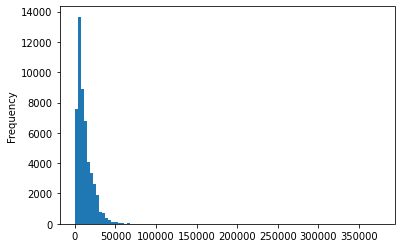

In [37]:
all_data_hist(df['price'])

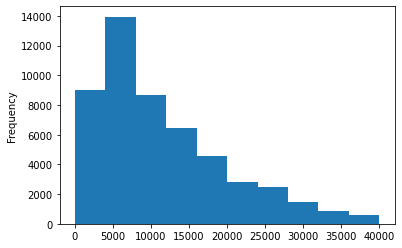

In [38]:
# The histogram needs a zoom in, but now we can see how far relevant data goes

df['price'].plot(kind='hist', range=(0,40000));

**Condition column**

count    51492.000000
mean         2.637594
std          0.712042
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

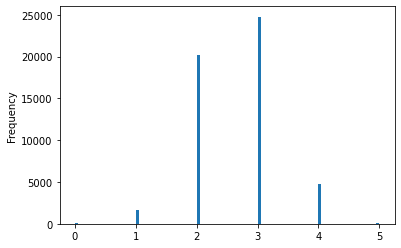

In [39]:
# Reminder: Condition is a categorical variable

all_data_hist(df['condition'])

**Cylinders column**

count    51492.000000
mean         6.120485
std          1.657775
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

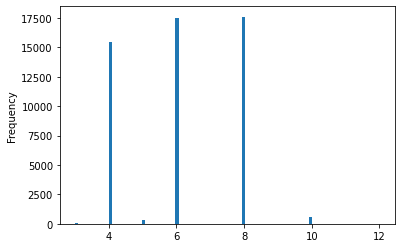

In [40]:
all_data_hist(df['cylinders'])

**Mileage column**

count     51492.000000
mean     115231.139303
std       62189.051416
min           0.000000
25%       73179.000000
50%      114778.500000
75%      151713.250000
max      990000.000000
Name: mileage, dtype: float64

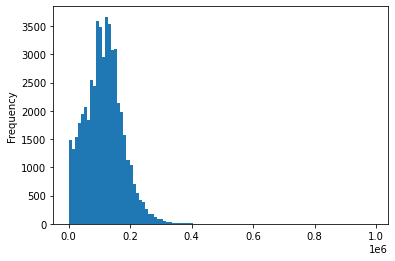

In [41]:
all_data_hist(df['mileage'])

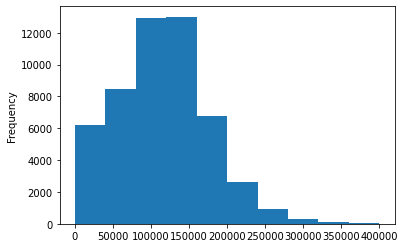

In [42]:
df['mileage'].plot(kind='hist', range=(0, 400000));

**Vehicle age column**

count    51492.00000
mean         8.49664
std          6.04751
min          0.00000
25%          4.00000
50%          7.00000
75%         12.00000
max        110.00000
Name: vehicle_age, dtype: float64

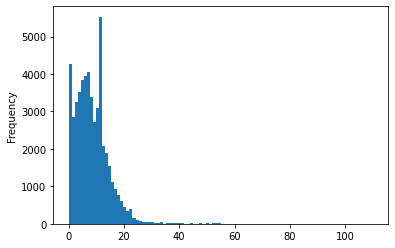

In [43]:
all_data_hist(df['vehicle_age'])

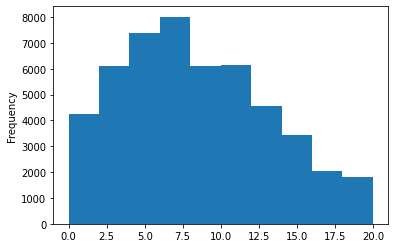

In [44]:
df['vehicle_age'].plot(kind='hist', range=(0, 20));

**Normal and outlier values**

***Normal values:***

- Price: Mean price is 12,132 and median is 9,000
- Condition: 2 and 3
- Cylinders: 4, 6 and 8
- Mileage: mean and median are aproximately same, 115,000
- Vehicle age: median age is 7


***Outliers values***

- Price: higher than 50,000
- Condition: 0 and 5
- Cylinders: Others than 4, 6, 8, 10
- Mileage: higher than 350,000
- Vehicle age: higher than 30

In [45]:
# storing a filtered dataset without the outliers

no_outlier_df = df.query('price <= 50000 and cylinders in (4, 6, 8, 10) and mileage <= 350000 and vehicle_age <= 30')
no_outlier_df

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,avg_yrl_milage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,Friday,3,2019,16,12115
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,2,40451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,Wednesday,10,2018,5,17627
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,Wednesday,11,2018,16,11343
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,Thursday,11,2018,9,14222
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,Monday,7,2018,5,27914


**Ad duration**

In [46]:
no_outlier_df['days_listed'].describe()

count    50514.000000
mean        39.549293
std         28.201818
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

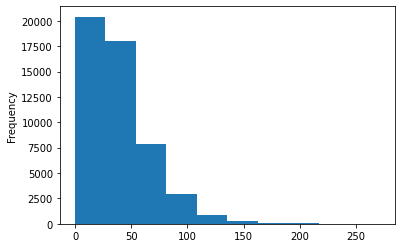

In [47]:
no_outlier_df['days_listed'].plot(kind='hist')
plt.show()

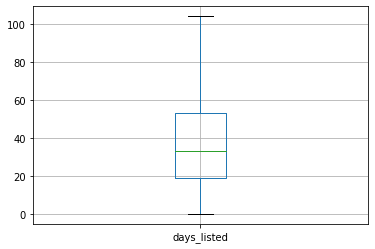

In [48]:
no_outlier_df.boxplot(column='days_listed', showfliers=False)
plt.show()

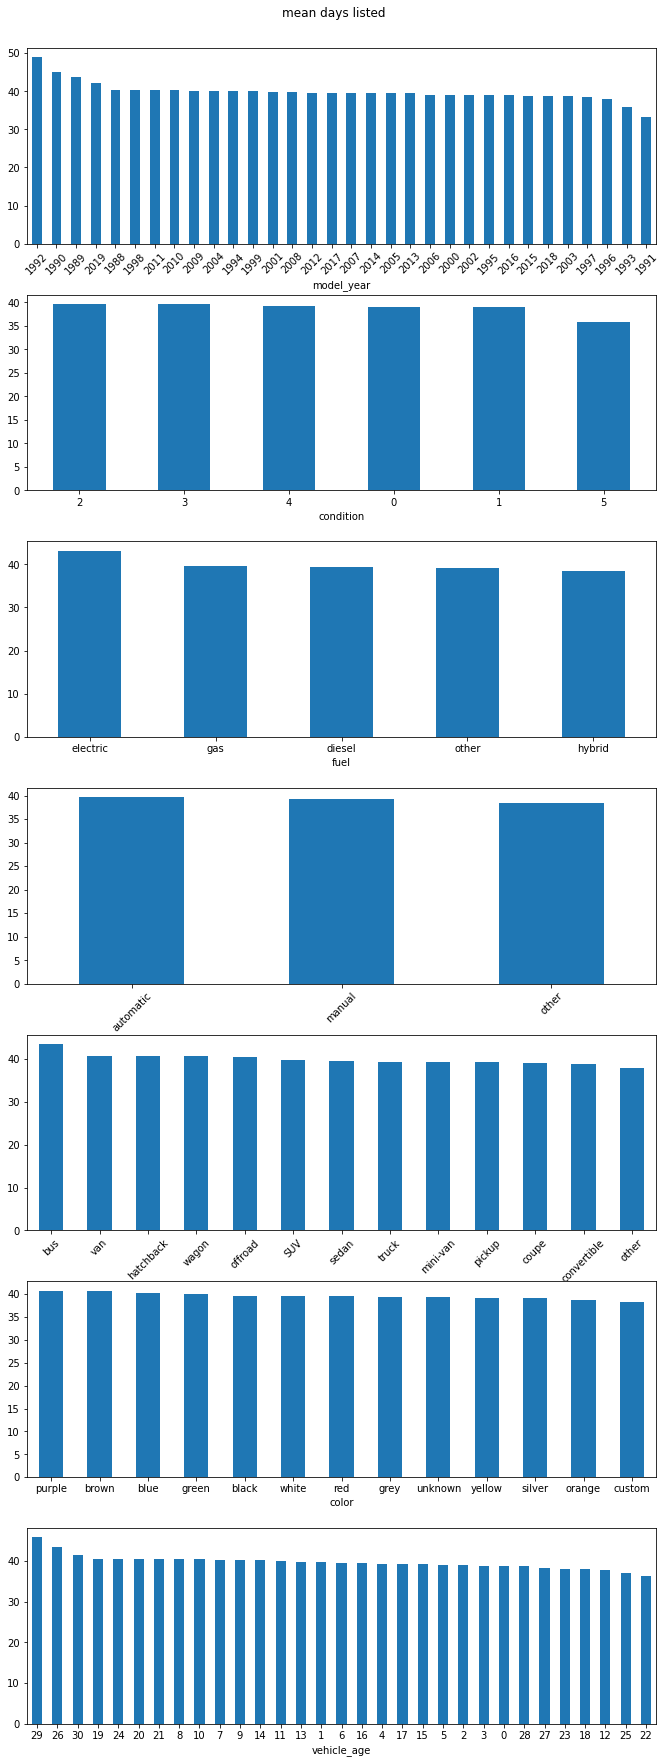

In [49]:
cols = ['model_year', 'condition', 'fuel', 'transmission', 'type', 'color', 'vehicle_age']
rotation_x_axis = [45, 0, 0, 45, 45, 0, 0]

fig, axes = plt.subplots(7, 1, figsize=(10, 25))
fig.suptitle('mean days listed')
fig.tight_layout(pad=3)

for i, col in enumerate(cols):
    no_outlier_df.groupby(col)['days_listed'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes.ravel()[i], rot=rotation_x_axis[i])

As we can see, ad lifetime is about 40 days escept for old vehicles and buses.

In [50]:
no_outlier_df.query('type == "bus"').groupby('model')['days_listed'].mean()

model
ford econoline      45.470588
ford explorer       28.800000
ford f-250          53.000000
hyundai santa fe    74.000000
Name: days_listed, dtype: float64

In [51]:
no_outlier_df.query('days_listed <= 7').groupby('type')['mileage'].mean().sort_values(ascending=False)

type
bus            225000.000000
van            129140.489362
mini-van       127296.407407
truck          123371.780899
hatchback      122734.269841
pickup         120206.140049
wagon          119465.525253
SUV            117206.243607
offroad        116645.461538
other          107166.866667
sedan          107117.274510
convertible     87311.333333
coupe           74821.213740
Name: mileage, dtype: float64

In [52]:
no_outlier_df.query('days_listed <= 1').groupby('type')['mileage'].mean().sort_values(ascending=False)

type
hatchback      139861.875000
wagon          123008.000000
pickup         121207.580645
offroad        116625.000000
truck          114379.019231
mini-van       113059.333333
van            112822.285714
sedan          107395.265306
SUV            102308.312500
convertible     73081.000000
coupe           54890.000000
Name: mileage, dtype: float64

Vehicles with high mileage are sold fast and vehicles with high performance such as convertible and coupes with low mileage

**Average price for each type of vehicle**

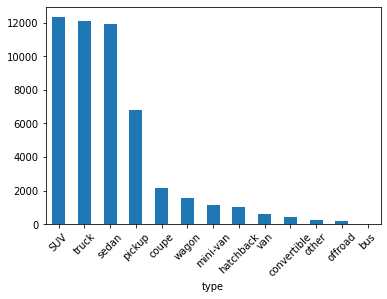

             ads_count
type                  
SUV              12327
bus                 24
convertible        396
coupe             2128
hatchback         1029
mini-van          1155
offroad            209
other              250
pickup            6821
sedan            11919
truck            12094
van                628
wagon             1534


In [53]:
type_ads = no_outlier_df.pivot_table(index='type', values='price', aggfunc='count')
type_ads.columns = ['ads_count']
type_ads['ads_count'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.show()
print(type_ads)

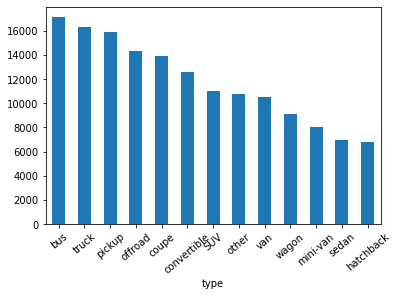

             price
type              
bus          17136
truck        16341
pickup       15870
offroad      14297
coupe        13941
convertible  12575
SUV          11025
other        10760
van          10489
wagon         9084
mini-van      8038
sedan         6970
hatchback     6805


In [54]:
type_avg_price = round(no_outlier_df.pivot_table(index='type', values='price', aggfunc='mean'), 0)
type_avg_price['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=40)
plt.show()
print(type_avg_price.sort_values(by='price', ascending=False).astype('int64'))

**Price factor**

***Suv***

In [55]:
suv = no_outlier_df.query('type == "SUV"')
suv.head()

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,avg_yrl_milage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,6,2018,7,20714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,Monday,1,2019,6,18245
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,Monday,7,2018,6,17362
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,Friday,2,2019,11,13381
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,Thursday,1,2019,10,13228


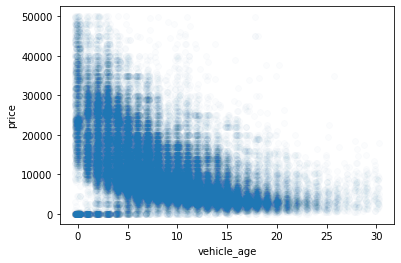

In [56]:
#vehicle_age
sb.regplot(data=no_outlier_df, x='vehicle_age', y='price', scatter_kws={'alpha':1/60}, fit_reg=False, x_jitter=0.3);
plt.show()

In [57]:
suv['vehicle_age'].corr(suv['price'])

-0.5714175628149429

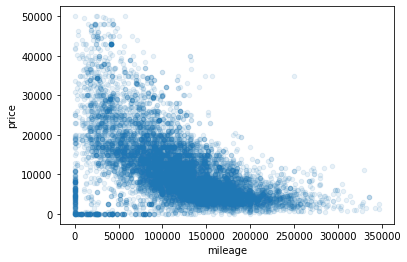

In [58]:
#mileage
suv.plot(x='mileage', y='price', kind='scatter', alpha=1/10)
plt.show()

In [59]:
suv['mileage'].corr(suv['price'])

-0.5433290015900212

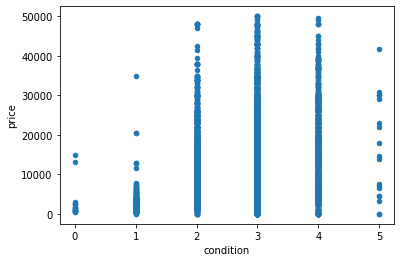

In [60]:
#condition
suv.plot(x='condition', y='price', kind='scatter')
plt.show()

In [61]:
suv['condition'].corr(suv['price'])

0.274699415386876

              model
transmission       
other           159
manual          500
automatic     11668


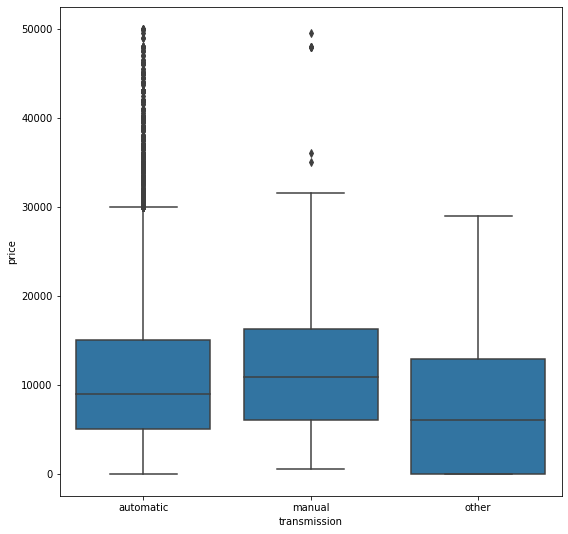

In [62]:
#transmission
print(suv.pivot_table(index = 'transmission', values = 'model', aggfunc = 'count').sort_values(by = 'model'))
plt.figure(figsize=(9,9))
sb.boxplot(data=suv, x='transmission', y='price', color=sb.color_palette()[0]);

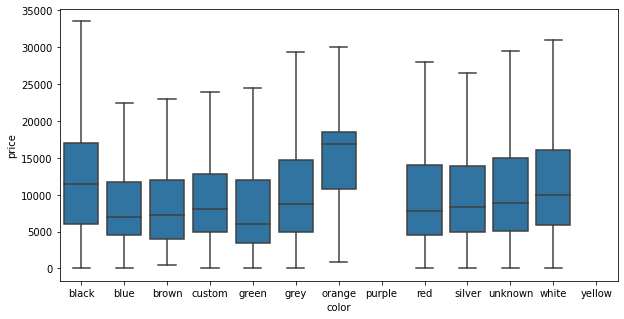

In [63]:
#color
suv.pivot_table(index = 'color', values = 'model', aggfunc = 'count').sort_values(by = 'model')
suv_ready = suv.query('color != "purple" and color != "yellow"')
suv_ready['color'].value_counts()

plt.figure(figsize=(10,5))
sb.boxplot(data=suv_ready, x='color', y='price', color=sb.color_palette()[0], showfliers=False);

                price  vehicle_age   mileage  condition
price        1.000000    -0.571418 -0.543329   0.274699
vehicle_age -0.571418     1.000000  0.630177  -0.325170
mileage     -0.543329     0.630177  1.000000  -0.362871
condition    0.274699    -0.325170 -0.362871   1.000000


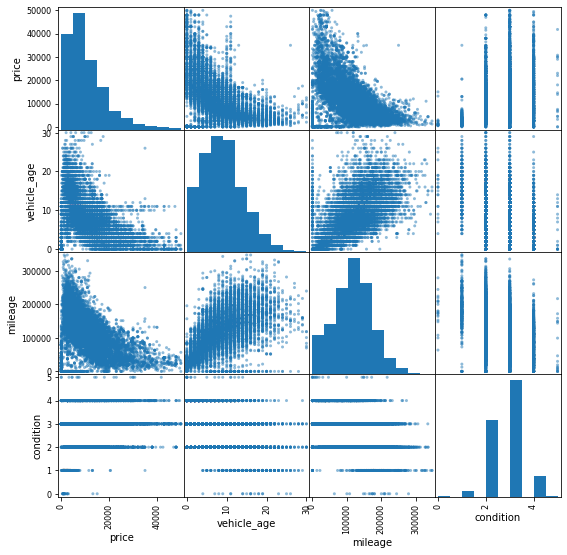

In [64]:
suv2 = suv[['price','vehicle_age', 'mileage', 'condition']]
print(suv2.corr())
pd.plotting.scatter_matrix(suv2, figsize=(9, 9));

- Most of the vehicles are of automatic transmission.

- Black is the most popular colour and it gets the highest price.

- 25 percentage of orange vehicles represent aproximately the median of black ones, this makes the orange unique and coveted.

- Strong correlation mileage vs price: the higher the mileage, the lower the price.

- Small correlation condition vs price.

- Strong correlation car age vs price: the older the car, the lower the price.

***Truck***

In [65]:
truck = no_outlier_df.query('type == "truck"')
truck.head()

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,avg_yrl_milage
22,7500,2004,chevrolet silverado,4,8,gas,180000,automatic,truck,red,True,2019-01-05,64,Saturday,1,2019,15,12000
39,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,True,2019-03-31,1,Sunday,3,2019,10,23400
50,6200,2006,ford f-150,3,6,gas,69698,automatic,truck,custom,False,2018-05-03,50,Thursday,5,2018,12,5808
60,13000,2005,ram 1500,2,8,gas,146000,automatic,truck,grey,True,2019-03-14,26,Thursday,3,2019,14,10428
61,16999,2013,chevrolet silverado 1500,2,8,gas,137230,automatic,truck,white,True,2018-05-29,24,Tuesday,5,2018,5,27446


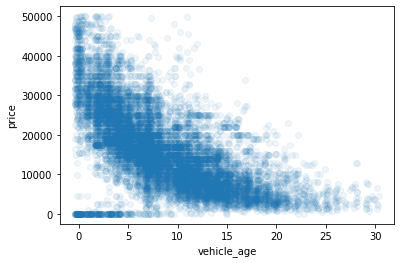

In [66]:
#car_age

sb.regplot(data=truck, x='vehicle_age', y='price', scatter_kws={'alpha':1/15}, fit_reg=False, x_jitter=0.4);
plt.show()

In [67]:
truck['vehicle_age'].corr(truck['price'])

-0.6258166499344125

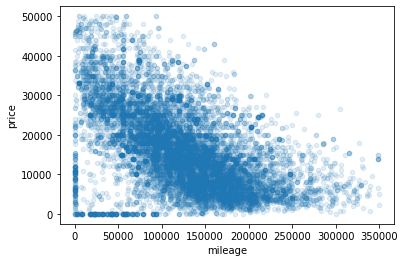

In [68]:
#mileage

truck.plot(x='mileage', y='price', kind='scatter', alpha=1/8)
plt.show()

In [69]:
truck['mileage'].corr(truck['price'])

-0.5132497159654583

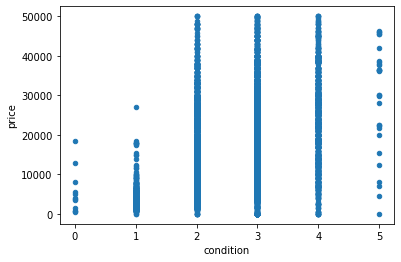

In [70]:
#condition

truck.plot(x='condition', y='price', kind='scatter')
plt.show()

In [71]:
truck['condition'].corr(truck['price'])

0.33161788030935097

              model
transmission       
other           205
manual          425
automatic     11464


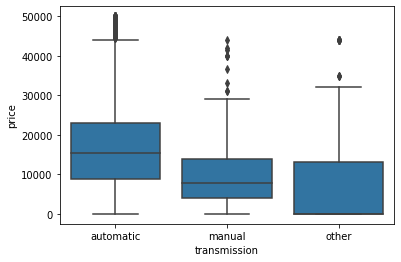

In [72]:
#transmission

print(truck.pivot_table(index = 'transmission', values = 'model', aggfunc = 'count').sort_values(by = 'model'))
sb.boxplot(data=truck, x='transmission', y='price', color=sb.color_palette()[0]);

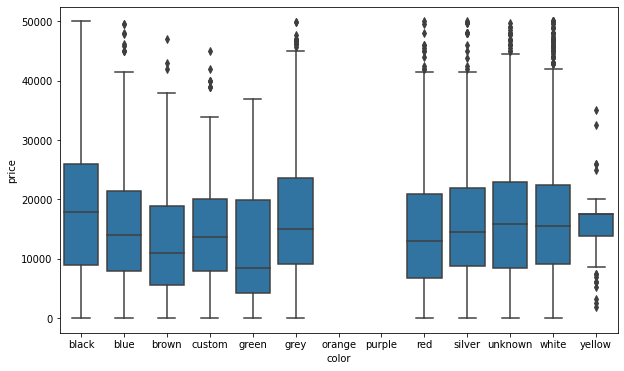

In [73]:
#color

truck.pivot_table(index = 'color', values = 'model', aggfunc = 'count', ).sort_values(by = 'model')
truck_ready = truck.query('color != "purple" and color != "orange"')
truck_ready['color'].value_counts()
plt.figure(figsize=(10,6))
sb.boxplot(data=truck_ready, x='color', y='price', color=sb.color_palette()[0]);

                price  vehicle_age   mileage  condition
price        1.000000    -0.625817 -0.513250   0.331618
vehicle_age -0.625817     1.000000  0.573098  -0.342559
mileage     -0.513250     0.573098  1.000000  -0.335017
condition    0.331618    -0.342559 -0.335017   1.000000


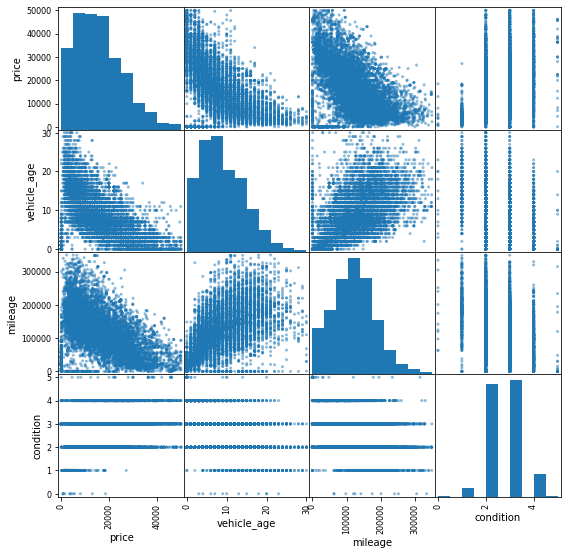

In [74]:
truck2 = truck[['price','vehicle_age', 'mileage', 'condition']]
print(truck2.corr())
pd.plotting.scatter_matrix(truck2, figsize=(9, 9));

- As with the suv's, the most of the trucks are of automatic transmission.

- The most popular colours are black and grey.

- Medium correlation condition vs price: Condition lightly affects the price.

- Strong correlation mileage vs price: the higher the mileage the lower the price.

- Strong correlation car age vs price: the older the car the lower the price.

**GENERAL CONCLUSIONS**

- Missing values in original dataset were treated according each variable.
- Columns names were treated replacing them with more idoneous names.
- Data types were modified according the nature of each variable.
- Each row in dataset means a vehicle offered for sale.
- The most expensive vehicles are buses and trucks.
- The most popular vehicles are suv's and trucks.
- The most common popular color for suv's and trucks is black.
- Suv's and trucks have a strong correlation for vehicle age vs price and mileage vs price.
- Suv's have a small condition vs price correlation.
- Trucks have a medium condition vs price correlation.
- The most of Suv's and trucks are of automatic transmission.